In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
def insert_random_missing_values(df, missing_fraction=0.1):
    """
    Randomly inserts missing values into a dataframe.
    
    Parameters:
        df (pd.DataFrame): The dataframe to modify.
        missing_fraction (float): Fraction of total values to replace with NaNs.
        
    Returns:
        pd.DataFrame: DataFrame with missing values inserted.
    """
    # Get the total number of elements in the dataframe
    total_elements = df.size

    # Calculate the number of missing values to be inserted
    n_missing = int(total_elements * missing_fraction)

    # Randomly select indices to replace with NaNs
    nan_indices = [
        (np.random.randint(0, df.shape[0]), np.random.randint(0, df.shape[1]))
        for _ in range(n_missing)
    ]

    # Replace the selected indices with NaN
    for row, col in nan_indices:
        df.iat[row, col] = np.nan

    return df


def getMissingValues(df):
    return df.isnull().sum().sort_values(ascending=True)
    

In [37]:
df = pd.read_csv("../dataset/bank.csv", sep=";");df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [38]:
df_with_missing = insert_random_missing_values(df, missing_fraction=0.01)

numeric_columns_to_fill = ['age', 'day', 'duration', 'campaign', 'pdays', 'previous']

for column in numeric_columns_to_fill:
    df_with_missing[column] = df_with_missing[column].astype('Int64')


df_with_missing

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129,4,211,3,other,no


In [39]:
getMissingValues(df_with_missing)

y            29
housing      37
default      38
previous     40
poutcome     41
loan         42
contact      42
age          43
month        45
education    48
job          49
day          49
balance      49
marital      52
campaign     54
duration     54
pdays        55
dtype: int64

In [40]:
# Define the columns to fill missing values with mean for numeric columns
numeric_columns_to_fill = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Fill missing values in numeric columns with their rounded mean values
df_with_missing[numeric_columns_to_fill] = df_with_missing[numeric_columns_to_fill].apply(lambda col: col.fillna(col.mean().round()))

# Drop rows with missing values in specific columns
df_with_missing.dropna(subset=['y', 'default'], inplace=True)

# Define categorical columns to fill with the mode value
categorical_columns_to_fill = ['marital', 'poutcome', 'contact', 'month', 'education', 'job']

# Fill missing values in each categorical column with the mode value
df_with_missing[categorical_columns_to_fill] = df_with_missing[categorical_columns_to_fill].apply(lambda col: col.fillna(col.mode()[0]))

# Fill missing values in binary columns 'loan' and 'housing' using random choices
binary_columns = ['loan', 'housing']
df_with_missing[binary_columns] = df_with_missing[binary_columns].apply(lambda col: col.apply(lambda x: np.random.choice(['yes', 'no']) if pd.isnull(x) else x))

# Display the cleaned DataFrame
df_with_missing


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129,4,211,3,other,no


In [41]:
getMissingValues(df_with_missing)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [42]:
df_with_missing['job'].value_counts()

job
management       996
blue-collar      921
technician       748
admin.           462
services         408
retired          225
self-employed    178
entrepreneur     165
unemployed       125
housemaid        107
student           82
unknown           37
Name: count, dtype: int64

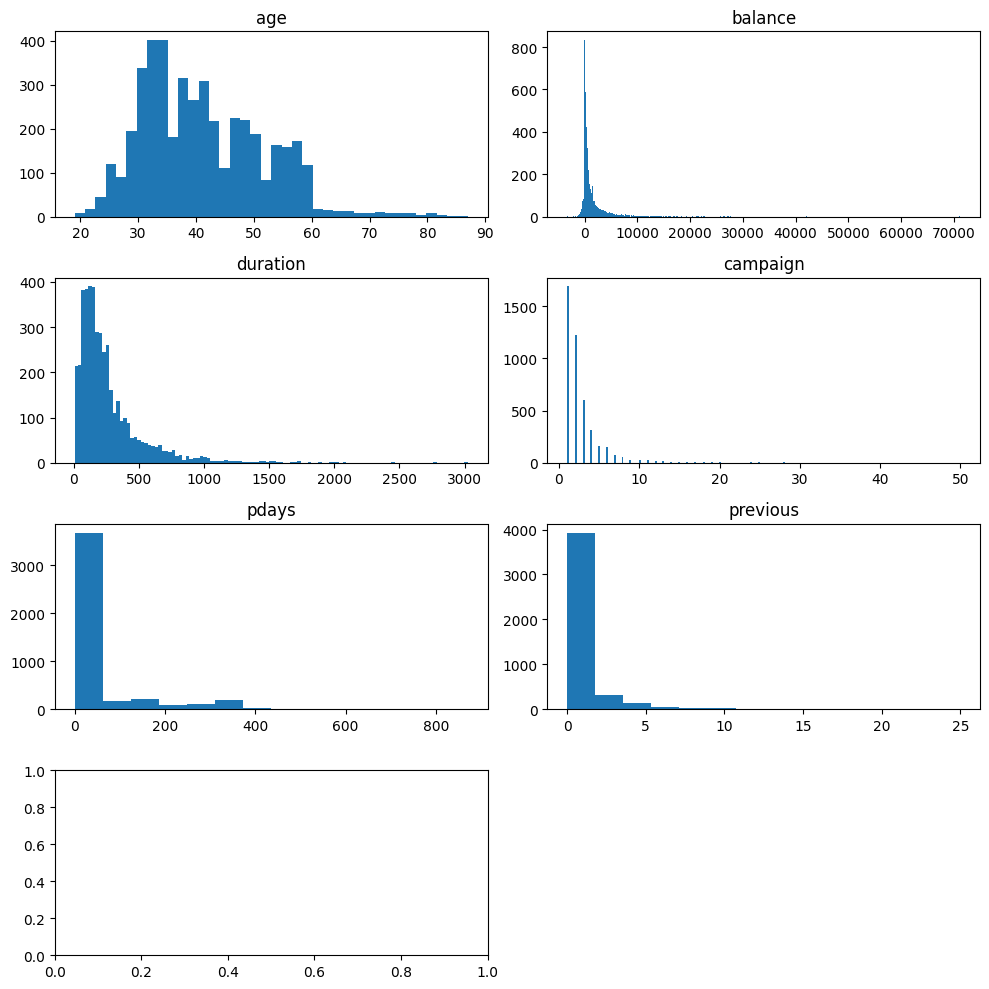

In [43]:
# Create a 4x2 grid of subplots
fig, ax = plt.subplots(4, 2,figsize=(10, 10))

# Plot histograms on each subplot
ax[0, 0].hist(df['age'], bins="auto")
ax[0, 1].hist(df['balance'], bins="auto")
ax[1, 0].hist(df['duration'], bins="auto")
ax[1, 1].hist(df['campaign'], bins="auto")
ax[2, 0].hist(df['pdays'], bins="auto")
ax[2, 1].hist(df['previous'], bins="auto")

# Set titles for each subplot
ax[0, 0].set_title('age')
ax[0, 1].set_title('balance')
ax[1, 0].set_title('duration')
ax[1, 1].set_title('campaign')
ax[2, 0].set_title('pdays')
ax[2, 1].set_title('previous')

# Remove the empty subplot in the last row and last column
fig.delaxes(ax[3, 1])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()